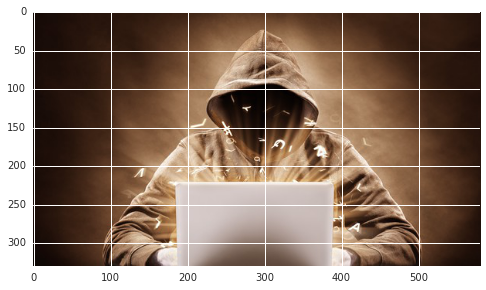

In [11]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import dct,idct
import seaborn as sea
img = cv2.imread('hacker.jpg')
plt.imshow(img)
plt.show()

## Implemented DCT & IDCT for 2D using python functions

In [12]:
from scipy.fftpack import dct
def DCT_2d(M):
    return dct(dct(M.T, norm='ortho').T,norm='ortho')

In [13]:
from scipy.fftpack import idct
def IDCT_2d(M):
    return idct(idct(M, norm='ortho').T, norm='ortho').T

## Proving the correctness

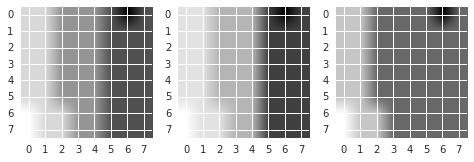

In [14]:
# Just to compare
part_of_the_img_0 = img[50:58, 50:58, 0] #using R
part_of_the_img_1 = img[50:58, 50:58, 1] #using G
part_of_the_img_2 = img[50:58, 50:58, 2] #using B
# Visualizing
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(part_of_the_img_0)
ax1 = fig.add_subplot(132)
ax1.imshow(part_of_the_img_1)
ax2 = fig.add_subplot(133)
ax2.imshow(part_of_the_img_2)

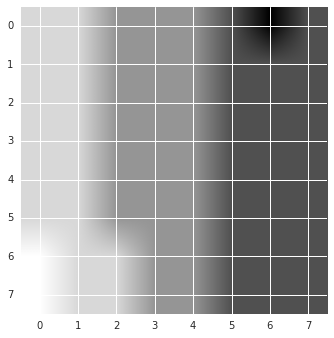

In [20]:
plt.imshow(part_of_the_img_0)
M = DCT_2d(part_of_the_img_0)

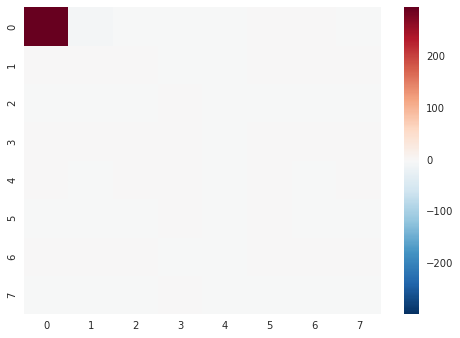

In [15]:
sea.heatmap(M)

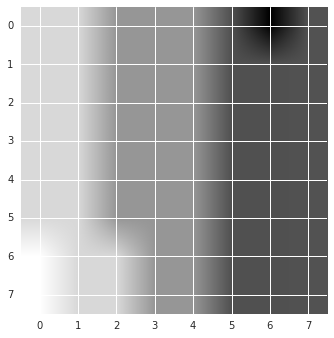

In [17]:
M1 = IDCT_2d(M)
plt.imshow(M1)

## Check the similarity of the initial matrix and the one we finally became

In [27]:
M1

array([[ 36.,  36.,  37.,  37.,  37.,  38.,  39.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 36.,  36.,  37.,  37.,  37.,  38.,  38.,  38.],
       [ 35.,  36.,  36.,  37.,  37.,  38.,  38.,  38.],
       [ 35.,  36.,  36.,  37.,  37.,  38.,  38.,  38.]])

In [23]:
part_of_the_img_0

array([[36, 36, 37, 37, 37, 38, 39, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [36, 36, 37, 37, 37, 38, 38, 38],
       [35, 36, 36, 37, 37, 38, 38, 38],
       [35, 36, 36, 37, 37, 38, 38, 38]], dtype=uint8)

In [28]:
M1 == part_of_the_img_0

array([[ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True],
       [ True, False,  True,  True,  True, False, False,  True]], dtype=bool)

In [30]:
print M1[1][6]
print part_of_the_img_0[1][6]

38.0
38


Notice that the matrixes are similar, they differ only by type, so the functions work!

## Let me introduce our basic functions :)

In [18]:
TM = np.matrix('1 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0\
              ; 0 0 0 0 0 0 0 0')

[[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]]


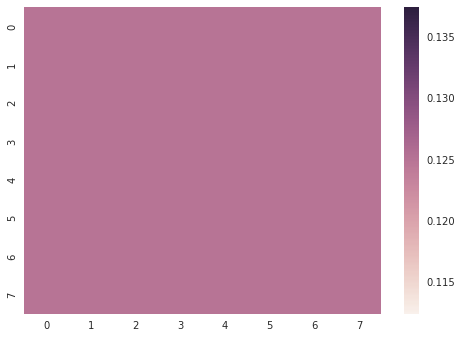

In [34]:
M1 = IDCT_2d(TM) #inverse DCT
sea.heatmap(M1) #as expected the function is constant
print M1

In [37]:
TM1 = np.matrix('0 1 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0\
               ; 0 0 0 0 0 0 0 0')

[[ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]
 [ 0.17337998  0.14698445  0.09821187  0.03448742 -0.03448742 -0.09821187
  -0.14698445 -0.17337998]]


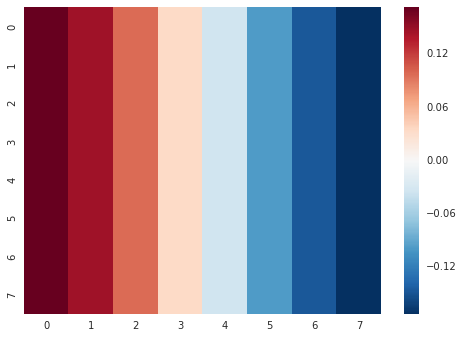

In [39]:
M2 = IDCT_2d(TM1)
sea.heatmap(M2) #the function is cos(...) 
print M2

In [47]:
TM1[0,1]

1

And so on we can become the bases functions

## Let's try to affect the [0,1] elem of DCT 2d

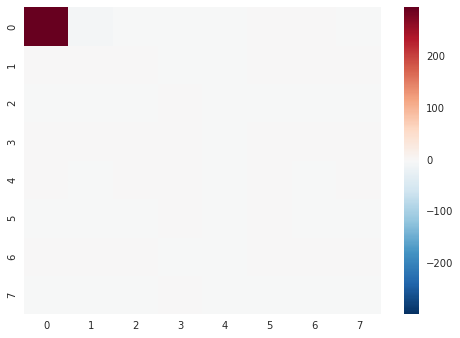

In [49]:
#plt.imshow(part_of_the_img_0)
T = DCT_2d(part_of_the_img_0)
sea.heatmap(T)

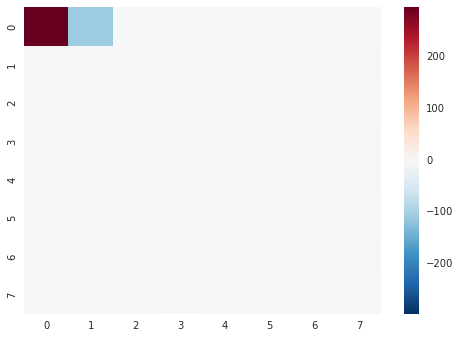

In [51]:
T = DCT_2d(part_of_the_img_0-100*M2) #M2 - THE BASIC FUNCTION OF [0,1]
sea.heatmap(T)

### Hurrray we changed the [0,1] coeff of DCT !!!

## Now have a look at initial and changed pictures 

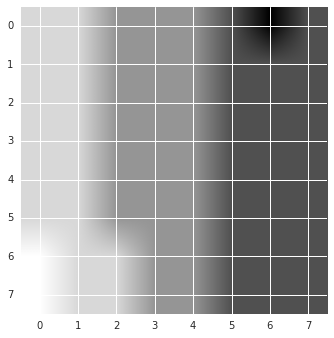

In [53]:
plt.imshow(part_of_the_img_0) # original

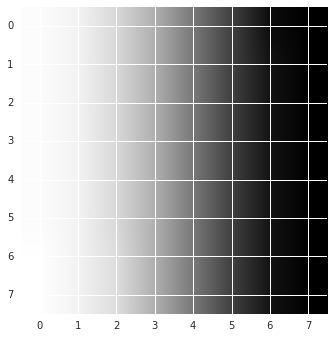

In [55]:
plt.imshow(part_of_the_img_0-100*M2) #transformed

The numbers in pixels change smoothly, this gives a hope that our changes will not be noticed by histograms!